<a href="https://colab.research.google.com/github/Rishavbhattacharya0105/Algorithm/blob/master/INSAID_term2_Project_moviesdatasetEDA_Sumit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the packages

In [3]:
import numpy as np

import pandas as pd
pd.set_option('mode.chained_assignment',None)
pd.set_option('display.max_colwidth',None)
pd.options.display.max_columns=50

import warnings
warnings.filterwarnings('ignore')

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid',font_scale=1.3, color_codes=True)

In [6]:
!pip install plotly --upgrade

     |████████████████████████████████| 13.0MB 253kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [7]:
!pip install chart-studio

     |████████████████████████████████| 71kB 2.1MB/s 


In [8]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly import tools
init_notebook_mode(connected=True)

**Problem Statement:**

In a world... where movies made an estimated $41.7 billion in 2018, the film industry is more popular than ever. But what movies make the most money at the box office? How much does a director matter?

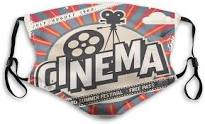

In [10]:
# importing the dataset
movies_df=pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/1000%20movies%20data.csv')
movies_df.head()

Rank                    Title                     Genre  \
0     1  Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1     2               Prometheus  Adventure,Mystery,Sci-Fi   
2     3                    Split           Horror,Thriller   
3     4                     Sing   Animation,Comedy,Family   
4     5            Suicide Squad  Action,Adventure,Fantasy   

                                                                                                                                                                                                                      Description  \
0                                                                                                 A group of intergalactic criminals are forced to work together to stop a fanatical warrior from taking control of the universe.   
1                                                                                                 Following clues to the origin of mankind, a team finds a structure on a distant moon, but they soon realize they are not alone.   
2                                                                   Three girls are kidnapped by a man with a diagnosed 23 distinct personalities. They must try to escape before the apparent emergence of a frightful new 24th.   
3  In a city of humanoid animals, a hustling theater impresario's attempt to save his theater with a singing competition becomes grander than he anticipates even as its finalists' find that their lives will never be the same.   
4                                             A secret government agency recruits some of the most dangerous incarcerated super-villains to form a defensive task force. Their first mission: save the world from the apocalypse.   

               Director  \
0            James Gunn   
1          Ridley Scott   
2    M. Night Shyamalan   
3  Christophe Lourdelet   
4            David Ayer   

                                                                       Actors  \
0                        Chris Pratt, Vin Diesel, Bradley Cooper, Zoe Saldana   
1     Noomi Rapace, Logan Marshall-Green, Michael Fassbender, Charlize Theron   
2            James McAvoy, Anya Taylor-Joy, Haley Lu Richardson, Jessica Sula   
3  Matthew McConaughey,Reese Witherspoon, Seth MacFarlane, Scarlett Johansson   
4                          Will Smith, Jared Leto, Margot Robbie, Viola Davis   

   Year  Runtime (Minutes)  Rating   Votes  Revenue (Millions)  Metascore  
0  2014                121     8.1  757074              333.13       76.0  
1  2012                124     7.0  485820              126.46       65.0  
2  2016                117     7.3  157606              138.12       62.0  
3  2016                108     7.2   60545              270.32       59.0  
4  2016                123     6.2  393727              325.02       40.0

In [11]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


**Insights from info function:**
1. There are 12 columns and 1000 entries
2. There are 7 numeric and 5 object data types
3. There are missing values in Revenue and Metascore columns

In [12]:
movies_df.describe()

Rank         Year  Runtime (Minutes)       Rating         Votes  \
count  1000.000000  1000.000000        1000.000000  1000.000000  1.000000e+03   
mean    500.500000  2012.783000         113.172000     6.723200  1.698083e+05   
std     288.819436     3.205962          18.810908     0.945429  1.887626e+05   
min       1.000000  2006.000000          66.000000     1.900000  6.100000e+01   
25%     250.750000  2010.000000         100.000000     6.200000  3.630900e+04   
50%     500.500000  2014.000000         111.000000     6.800000  1.107990e+05   
75%     750.250000  2016.000000         123.000000     7.400000  2.399098e+05   
max    1000.000000  2016.000000         191.000000     9.000000  1.791916e+06   

       Revenue (Millions)   Metascore  
count          872.000000  936.000000  
mean            82.956376   58.985043  
std            103.253540   17.194757  
min              0.000000   11.000000  
25%             13.270000   47.000000  
50%             47.985000   59.500000  
75%            113.715000   72.000000  
max            936.630000  100.000000

**Insights from describe function:**

1. Data is considered for years from 2006 to 2016
2.Runtime data is almost normally distributed as mean(113.17) is near to the    median(111)
3.There are outliers in Votes in both minimum & maximum values as difference between min & 25% value as well as between 75% & maximum values are huge.
4.Revenues & Metascore column also follows similar pattern. This observation may have the answer to the problem statement as both Metascore, Vote & Revenue may have a positive correlation which needs to be explored

**Let us do a data preprocessing before starting EDA on the dataset**

In [13]:
# installing the pandas profiling package
!pip install -U pandas-profiling

     |████████████████████████████████| 266kB 2.9MB/s 
     |████████████████████████████████| 71kB 4.6MB/s 
     |████████████████████████████████| 71kB 5.2MB/s 
     |████████████████████████████████| 3.1MB 8.8MB/s 
     |████████████████████████████████| 604kB 30.0MB/s 
     |████████████████████████████████| 71kB 7.9MB/s 
     |████████████████████████████████| 296kB 43.5MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27085 sha256=85367997d6fe038b8015a1e8d852b77730cce65fce1f6a7afaa3ef594f25d348
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291991 sha256=009226cd15c257067d6076de0da3661025935fccab522617ec66e2b6e5472062
  Stored in directory: /root/.cache/pip/wheels/07/1c/dc/6831446f09feb8cc199ec73a0f2f0703253f6ae013a22f4be9
Successfully built htmlmin imagehash
  Found existing installation: tqdm 4.41.1
    Uni

In [14]:
# importing the package
import pandas_profiling

In [17]:
profile=movies_df.profile_report(title="Movies Data Preprocessing report")
profile.to_file(output_file="Movies Data Preprocessing report.html")
profile.to_notebook_iframe()